<a href="https://colab.research.google.com/github/Madhesh23/Madheshethirunavukkarasu/blob/main/Gold_prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and processing

In [ ]:
#load the csv dataset to the panda dataframe
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [ ]:
#printing the first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
#print the last 5 rows in the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
#number of rows and column
gold_data.shape

(2290, 6)

In [ ]:
#getting more info about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking for missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
#statistical measures of the dataset
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlations:
1. Positive
2. negative

In [ ]:
gold_data = gold_data.drop('Date',axis=1)
correlations = gold_data.corr()

<Axes: >

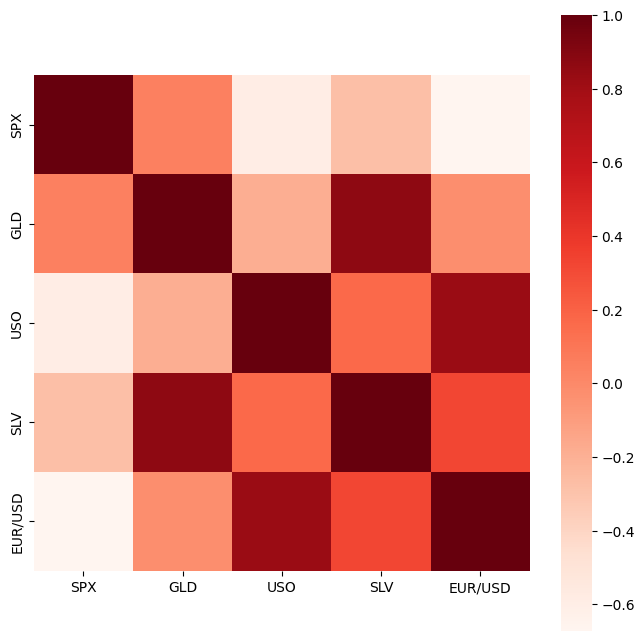

In [ ]:
#constructing a heatmap for the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlations, cbar=True, square=True, fmt='.1f', annot_kws={'size':8}, cmap='Reds')

In [ ]:
#correlation values of GLD
print(correlations['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-27-7e351ad59cb0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='Blue')


<Axes: xlabel='GLD', ylabel='Density'>

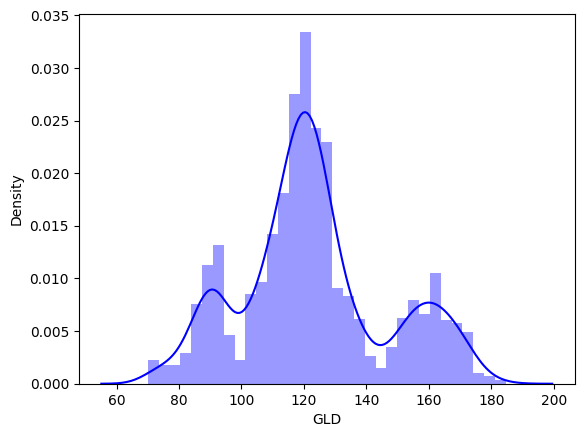

In [ ]:
#checking the distribution of the gold price
sns.distplot(gold_data['GLD'], color='Blue')

Splitting the Features and Target

In [ ]:
X = gold_data.drop(['GLD'],axis=1)
Y = gold_data['GLD']

In [ ]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting the training and testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

Model training:
Random forest Regressor

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
#training the model
regressor.fit(X_train, Y_train)


RandomForestRegressor()

In [ ]:
#model evaluation
#prediction on the test data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.64089965  82.28639966 115.88690027 127.62680051 120.74070131
 154.64109736 150.45559811 126.24340042 117.32729893 125.94830048
 116.56600124 171.97000105 141.59589938 167.4512989  115.31679996
 117.63060054 140.53400269 170.3044013  159.56520315 158.58409899
 155.1149     125.42600009 175.73879907 157.10060291 125.21520048
  93.71019966  77.34460001 120.89849996 119.09309895 167.57430023
  88.15360033 125.13889978  91.02940063 117.74130036 120.99949914
 136.44080084 115.56860145 114.98460094 145.12180028 107.32930117
 104.47730252  87.21329804 126.44170085 117.69870008 153.33609885
 119.64210033 108.38210004 107.96259821  93.26450057 127.03609778
  74.49030047 113.70799954 121.55470036 111.2364991  118.94839927
 120.77569938 159.44800054 169.13890089 147.09579696  86.04949875
  94.25930029  86.83209892  90.61340026 118.99970058 126.48840064
 127.71660083 170.24229973 122.25589946 117.23959901  98.61230026
 168.1371003  143.18149832 131.67670173 121.22290218 121.19079944
 119.83280

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.9891558893310072


Comparing the acutal and predicted values using a plot

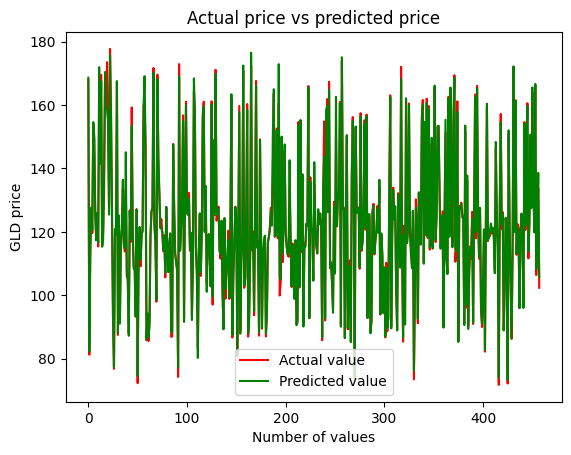

In [ ]:
Y_test = list(Y_test)
plt.plot(Y_test, color='Red', label='Actual value')
plt.plot(test_data_prediction, color='Green', label='Predicted value')
plt.title('Actual price vs predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()
